In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp

In [2]:
from dishpylib.pyhelpers import get_env_context
from dishpylib.pyhelpers import get_git_revision_hash
from dishpylib.pyhelpers import make_timestamp
from dishpylib.pyhelpers import print_runtime

In [3]:
print_runtime()

context: ci
hostname: 879fd5d404ff
interpreter: 3.8.15 (default, Oct 12 2022, 19:14:39)  [GCC 7.5.0]
revision: cde679bf0
timestamp: 2022-11-08T09:17:02Z00:00

IPython==7.16.1
boto3==1.14.44
botocore==1.17.44
iterdub==0.2.0
matplotlib==3.5.2
pandas==1.1.2
scipy==1.5.4
seaborn==0.11.2
teeplot==0.1.1


# get data

In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)

In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-4b8e8f9e4d8ca984'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]

# how does phenotype complexity change over time?

teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=phenotype-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=phenotype-complexity+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Phenotype Complexity'>

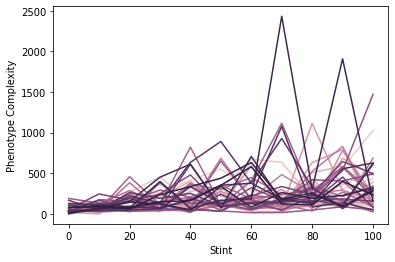

In [8]:
tp.tee(
    sns.lineplot,
    data=dfm10,
    x='Stint',
    y='Phenotype Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-mod10',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=hline-boxplot-swarmplot+x=stint+y=phenotype-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=hline-boxplot-swarmplot+x=stint+y=phenotype-complexity-delta+ext=.png


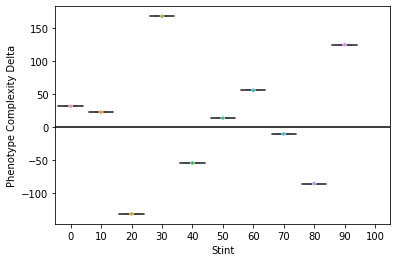

In [9]:
def hline_boxplot_swarmplot(*args, **kwargs):
    plt.axhline(
        0,
        c='k',
        zorder=-1,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )

tp.tee(
    hline_boxplot_swarmplot,
    data=dfm10,
    x='Stint',
    y='Phenotype Complexity Delta',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-mod10',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; y

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=boxplot-swarmplot+x=stint+y=phenotype-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=boxplot-swarmplot+x=stint+y=phenotype-complexity+ext=.png


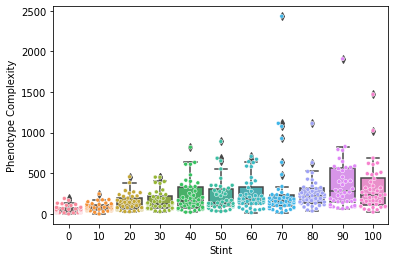

In [10]:
def boxplot_swarmplot(*args, **kwargs):
    sns.boxplot(
        *args,
        **kwargs,
    )
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )

tp.tee(
    boxplot_swarmplot,
    data=dfm10,
    x='Stint',
    y='Phenotype Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-mod10',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=boxplot-swarmplot+x=stint+y=num-instructions+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=boxplot-swarmplot+x=stint+y=num-instructions+ext=.png


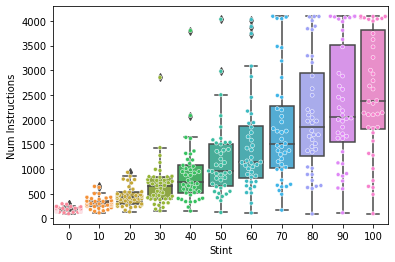

In [11]:
def boxplot_swarmplot(*args, **kwargs):
    sns.boxplot(
        *args,
        **kwargs,
    )
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )

tp.tee(
    boxplot_swarmplot,
    data=dfm10,
    x='Stint',
    y='Num Instructions',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-mod10',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=num-instructions+y=phenotype-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=groupby-Series-mean+viz=regplot+x=num-instructions+y=phenotype-complexity+ext=.png


(0.6445925140804959, 7.155630101771921e-06)

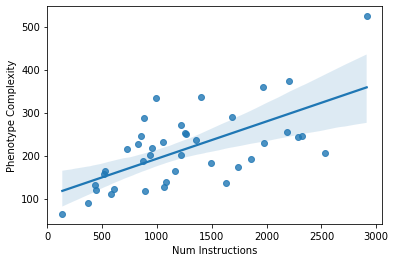

In [12]:
groupby_series_mean_df = df.groupby('Series').mean()
tp.tee(
    sns.regplot,
    data=groupby_series_mean_df,
    x='Num Instructions',
    y='Phenotype Complexity',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'groupby-Series-mean',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },

)
stats.pearsonr(
    df.groupby('Series')['Num Instructions'].mean(),
    df.groupby('Series')['Phenotype Complexity'].mean(),
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=identityline-regplot+x=phenotype-complexity+y=phenotype-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=identityline-regplot+x=phenotype-complexity+y=phenotype-complexity-delta+ext=.png


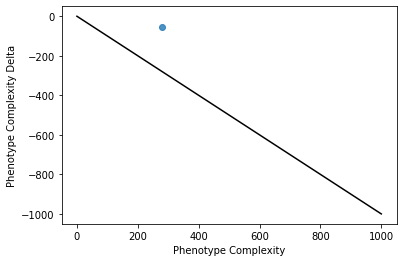

In [13]:
def identityline_regplot(*args, **kwargs):
    sns.regplot(
        *args,
        **kwargs,
    )
    plt.plot(
        [0,1000],
        [0,-1000],
        c='k',
    )

tp.tee(
    identityline_regplot,
    data=df40,
    x='Phenotype Complexity',
    y='Phenotype Complexity Delta',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=lmplot+x=phenotype-complexity+y=phenotype-complexity-delta-sign+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-40+viz=lmplot+x=phenotype-complexity+y=phenotype-complexity-delta-sign+ext=.png


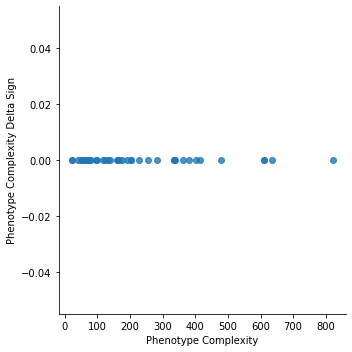

In [14]:
tp.tee(
    sns.lmplot,
    data=df40,
    x='Phenotype Complexity',
    y='Phenotype Complexity Delta Sign',
    logistic=True,
    truncate=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-40',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=boxplot+y=phenotype-complexity-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=boxplot+y=phenotype-complexity-delta+ext=.png


<AxesSubplot:ylabel='Phenotype Complexity Delta %'>

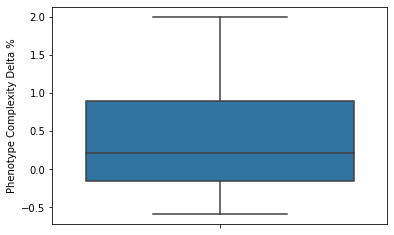

In [15]:
tp.tee(
    sns.boxplot,
    data=dfm10,
    y='Phenotype Complexity Delta %',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-mod10',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

# Case Study: Series 16005

teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=phenotype-complexity+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=phenotype-complexity+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Phenotype Complexity'>

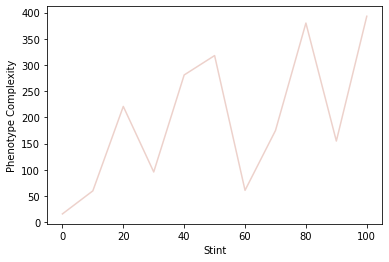

In [16]:
tp.tee(
    sns.lineplot,
    data=dfm10[ dfm10['Series'] == 16005 ],
    x='Stint',
    y='Phenotype Complexity',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'filter-Stint-mod10',
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)